<a href="https://colab.research.google.com/github/VyomaD/kdm_tech/blob/main/ICP_11/source/ICP11_CNN_FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical

In [37]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [38]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [39]:
# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [40]:
# train_images = train_images.reshape((60000, 28, 28, 1))
# test_images = test_images.reshape((10000, 28, 28, 1))
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [41]:
num_filters = 8
filter_size = 3
pool_size = 2

In [42]:
# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [43]:
# model_2 = models.Sequential()
# model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model_2.add(layers.MaxPooling2D((2, 2)))
# model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_2.add(layers.MaxPooling2D((2, 2)))
# model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [44]:
# model_2.summary()


In [45]:
# model_2.add(layers.Flatten())
# model_2.add(layers.Dense(64, activation='relu'))
# model_2.add(layers.Dropout(0.5))
# model_2.add(layers.Dense(10, activation='softmax'))

In [46]:
# model_2.summary()


In [47]:
# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [49]:
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2146 - accuracy: 0.9233 - val_loss: 0.3372 - val_accuracy: 0.8885
Epoch 2/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2141 - accuracy: 0.9229 - val_loss: 0.3312 - val_accuracy: 0.8883
Epoch 3/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2132 - accuracy: 0.9238 - val_loss: 0.3396 - val_accuracy: 0.8854
Epoch 4/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2120 - accuracy: 0.9256 - val_loss: 0.3356 - val_accuracy: 0.8861
Epoch 5/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2109 - accuracy: 0.9249 - val_loss: 0.3346 - val_accuracy: 0.8890
Epoch 6/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2082 - accuracy: 0.9255 - val_loss: 0.3461 - val_accuracy: 0.8840
Epoch 7/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2089 - accuracy: 0.9246 - val_loss: 0.3451 -

In [51]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

In [52]:
# Print our model's predictions.
print("These are the model predictions :")
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]
print("\n")

These are the model predictions :
[9 2 1 1 6]




In [53]:
# Check our predictions against the ground truths.
print("These are the corresponding labels :")
print(test_labels[:5]) # [7, 2, 1, 0, 4]

These are the corresponding labels :
[9 2 1 1 6]


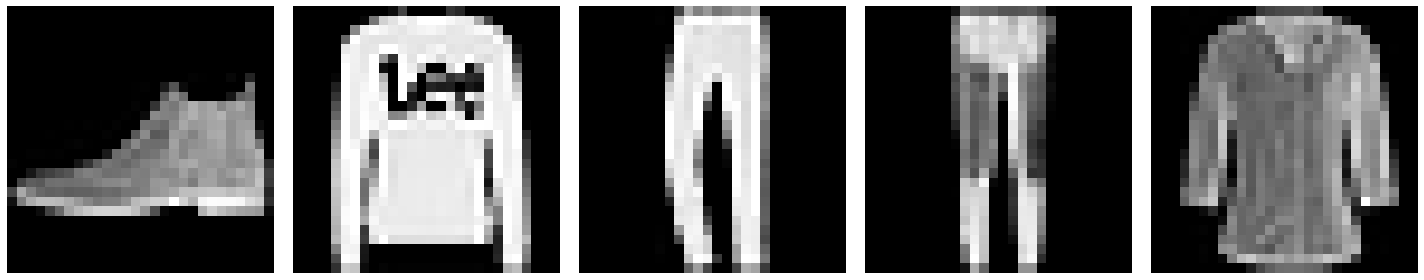

In [58]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 4))
for i in range(5):
    # original
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
plt.tight_layout()
plt.show()